<a href="https://colab.research.google.com/github/guiabbehusen/ML-PyTorch/blob/main/01_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from sklearn.datasets import make_circles

In [ ]:
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

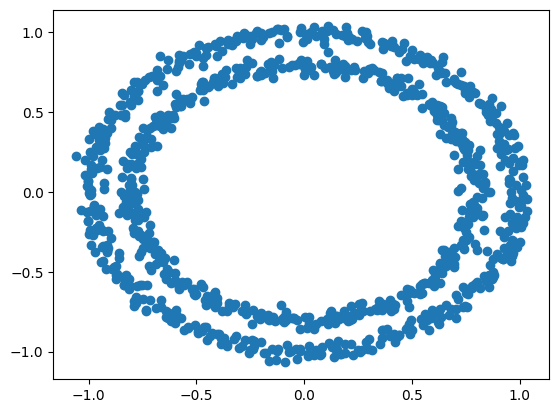

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
X = torch.from_numpy(X).type(torch.float)

In [ ]:
y = torch.from_numpy(y).type(torch.float)
type(y)

torch.Tensor

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
len(X_train), len(X_test)

(800, 200)

In [3]:
from transformers import pipeline

In [16]:
text = """I was thrilled to receive this package. I ordered an Optimus Prime action figure — the iconic Autobot leader, a true classic and my favorite character.

After days of waiting, the box finally arrived. I opened it eagerly, expecting to see Prime’s heroic figure, perfectly detailed and ready for display.

But what did I get?

Megatron. Not even a high-quality one — just a cheap knockoff with sloppy paint, wobbly joints, and a face that’s honestly unsettling.

This isn’t just a mistake; it’s a huge disappointment. Imagine expecting the noble Optimus Prime and finding Megatron’s creepy grin staring back at you.

Really frustrated. I didn’t order a Decepticon, and I definitely don’t want this one.

I’m requesting an exchange for the correct Optimus Prime figure ASAP. Transformers fans deserve better."""

In [17]:
import pandas as pd
classifier = pipeline("text-classification")
outputs=classifier(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,label,score
0,NEGATIVE,0.99751


In [18]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs=ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


,entity_group,score,word,start,end
0,MISC,0.955577,Optimus Prime,53,66
1,MISC,0.970401,Autobot,94,101
2,PER,0.972611,Prime,239,244
3,PER,0.568141,Megatron,326,334
4,MISC,0.756811,Optimus Prime,545,558
5,PER,0.871302,Megatron,571,579
6,MISC,0.927590,Decepticon,652,662
7,MISC,0.964183,Optimus Prime,746,759
8,MISC,0.780297,Transformers,773,785


In [19]:
reader = pipeline("question-answering")
question = "What does the customer wants?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,score,start,end,answer
0,0.285549,718,771,an exchange for the correct Optimus Prime figu...


In [33]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length = 45, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
Your min_length=56 must be inferior than your max_length=45.


 The Transformers fans deserve better. Transformers fans need better. I’m requesting an exchange for the correct Optimus Prime figure. I didn’t order a Decepticon, and I definitely don’


In [34]:
print(outputs[0]['summary_text'])

 The Transformers fans deserve better. Transformers fans need better. I’m requesting an exchange for the correct Optimus Prime figure. I didn’t order a Decepticon, and I definitely don’
